<a href="https://colab.research.google.com/github/DanielAgredano/Algoritmos/blob/main/convex_hull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 3.1 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=c7c67c0f8c3ab9446fbce164256b7a69e9bee604ce34f7f82abdb5f6499af83c
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 34.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 2.1 MB/s eta 0:00:00
  Created wheel for loompy: filename=loompy-3.0.7-py3-none-any.whl siz

/usr/local/lib/python3.10/dist-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 59236 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


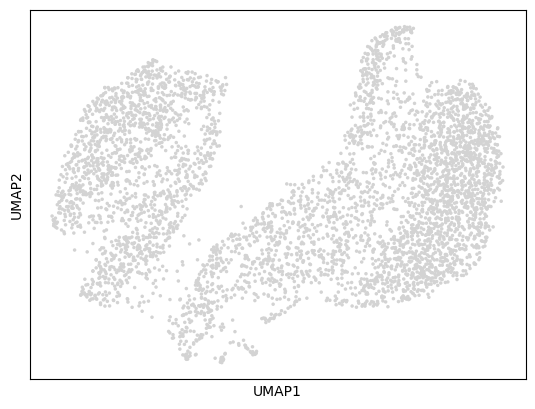

In [ ]:
!pip install scanpy
!pip install anndata
!pip install -U loompy
from google.colab import drive
drive.mount('/content/drive')
import scanpy as sc
import anndata as ad
adata = ad.read_h5ad("/content/drive/MyDrive/algoritmos/1c2d14d8-32d4-41be-b38d-ba975ad10efa.h5ad")
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata)

In [ ]:
#Extraer las coordenadas UMAP y el identificador de cluster
umap_coordinates = adata.obsm['X_umap']
cluster_ids = adata.obs['cluster_id']


In [ ]:
umap_coordinates

In [ ]:
cluster_ids

<ipython-input-4-779dfbcbc5a0>:64: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_clusters))


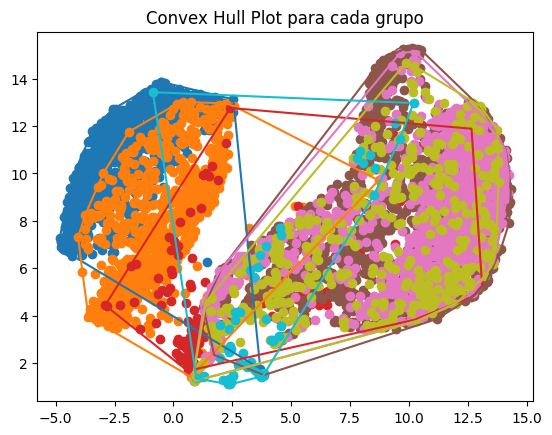

In [ ]:
#CONVEX HULL
import numpy as np
import matplotlib.pyplot as plt

# Función para encontrar el punto más a la izquierda
def leftmost_point(points):
    min_point = points[0]
    for point in points[1:]:
        if point[0] < min_point[0]:
            min_point = point
        elif point[0] == min_point[0] and point[1] < min_point[1]:
            min_point = point
    return min_point

# Función para calcular la orientación de tres puntos
# Devuelve un valor positivo si la secuencia de puntos es en sentido antihorario,
# negativo si es en sentido horario, y 0 si son colineales
def orientation(p, q, r):
    return (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])

# Función para encontrar el Convex Hull usando el algoritmo de Gift Wrapping
def convex_hull(points):
    hull = []

    # Encuentra el punto más a la izquierda
    start = leftmost_point(points)
    hull.append(start)

    current_point = start
    while True:
        # Selecciona un punto arbitrario (distinto del punto actual) para empezar
        next_point = points[0] if (points[0] != current_point).any() else points[1]

        for point in points:
            if np.array_equal(point, current_point):
                continue

            # Si encontramos un punto más a la izquierda que next_point,
            # lo establecemos como el siguiente punto
            if orientation(current_point, next_point, point) < 0:
                next_point = point

        current_point = next_point

        # Si hemos vuelto al punto inicial, cerramos el hull
        if np.array_equal(current_point, start):
            break

        hull.append(current_point)

    return np.array(hull)

# Función para trazar el Convex Hull para cada cluster
def plot_manual_convex_hull(points, ax, color):
    hull_points = convex_hull(points)
    hull_points = np.vstack([hull_points, hull_points[0]])  # Cerrar el polígono
    ax.plot(hull_points[:, 0], hull_points[:, 1], color=color)

# Crear un gráfico con los convex hulls
fig, ax = plt.subplots()

# Obtener los colores para cada cluster
unique_clusters = np.unique(cluster_ids)
colors = plt.cm.get_cmap('tab10', len(unique_clusters))

# Trazar los convex hulls y los puntos UMAP
for i, cluster in enumerate(unique_clusters):
    # Filtrar las coordenadas UMAP para el cluster actual
    cluster_points = umap_coordinates[cluster_ids == cluster]

    # Trazar los puntos UMAP
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors(i), label=f'Cluster {cluster}')

    # Obtener un color más claro para el hull convexo
    lighter_color = colors(i, alpha=1)  # Ajustar la transparencia (alpha) para un color más claro

    # Trazar el convex hull con el color más claro
    plot_manual_convex_hull(cluster_points, ax, color=lighter_color)

plt.title('Convex Hull Plot para cada grupo')
plt.show()
